# Insper - Ciência dos Dados 2022.2

## Engenharia - 2ºB

### Integrantes do grupo:

* Beatriz Rodrigues de Freitas

* Carlos Eduardo Porciuncula Yamada

* Verônica Luisa Ribeiro Lima

___
<div id='sumario'></div>

## Sumário

1. [Introdução](#intro)

2. [Minerando Dados e Características do Dataset](#data-mining)

3. [Modelos de Predição](#prediction)

4. [Processo e Estatísticas de Validação](#validation)

5. [Conclusão](#conclusion)

6. [Referências Bibliográficas](#ref)

___
<div id='intro'></div>

## 1. Introdução

### Objetivo

O objetivo deste projeto é criar um código capaz de prever o preço de um notebook (em euros) a partir de algumas features fornescidas pela base de dados "Laptop_price", disponibilizada na plataforma Kaggle por MUHAMMET VARLI em 2020. 
Os dados utilizados para a modelagem da target estão descritos a seguir:


### Descrição da base de dados

* `Company`: **object** → Fabricante do computador;

* `TypeName`: **object** → Tipo do uso;

* `Inches`: **float** → Tamanho (em polegadas);

* `Cpu`: **object** → Qual o processador;

* `Ram`: **object** → Quantidade de memória Ram;

* `Memory`: **object** → Quantidade de memória Rom, assim como o seu tipo;

* `Product`: **object** → Modelo do notebook;

* `ScreenResolution`: **object** → Resolução da tela;

* `OpSys`: **object** → Sistema operacional.


As bibliotecas utilizadas na contrução do robô serão as seguintes:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import os
import re 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop_price = pd.read_csv('dados/base_celular.csv',sep=',',  encoding='latin-1')
laptop_price.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0.0,1,0,7,0.6,188.0,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1.0,0,1,53,0.7,136.0,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1.0,2,1,41,0.9,145.0,5,...,1263,1716,2603,11,2,9,1,1,0,2


___
<div id='data-mining'></div>

## 2. Minerando Dados e Características do Dataset




In [3]:
dados = laptop_price.loc[:, ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi','price_range']]

dados.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0.0,1,0,7,0.6,188.0,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1.0,0,1,53,0.7,136.0,3,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1.0,2,1,41,0.9,145.0,5,1263,1716,2603,11,2,9,1,1,0,2


In [4]:
dados.shape

(3000, 20)

[Voltar para o sumário](#sumario)


## 2.1 Análise exploratória


### 2.1 Disposição dos preços

Entendendo como o preço varia na base de dados

In [5]:
dados['price_range'].describe()

count    3000.000000
mean        1.169000
std         1.065904
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: price_range, dtype: float64

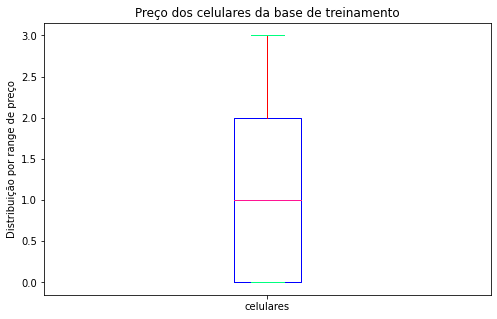

In [6]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.boxplot(dados['price_range'], labels = ['celulares'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('Preço dos celulares da base de treinamento')
plt.ylabel('Distribuição por range de preço')

plt.show()

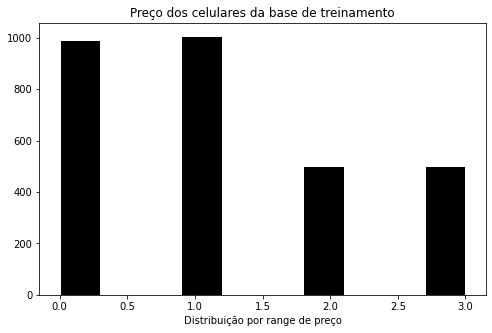

In [8]:
plt.figure(figsize=(8,5))

plt.subplot(111)
plt.hist(dados['price_range'], edgecolor='white', color='k')
plt.xlabel('Distribuição por range de preço')
plt.title("Preço dos celulares da base de treinamento")
plt.show()

### 2.2 Comparação das variáveis

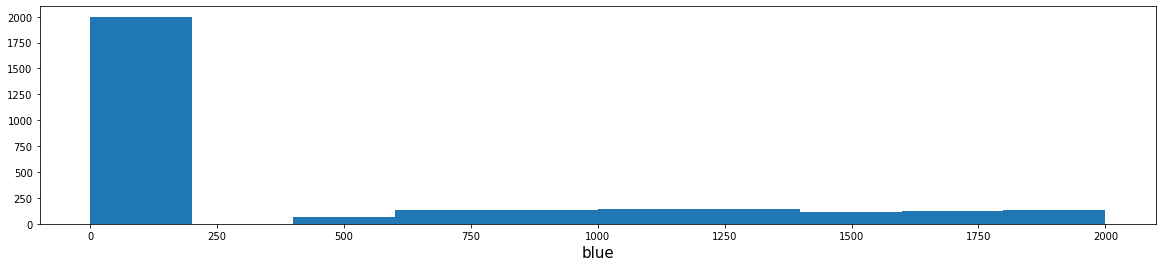

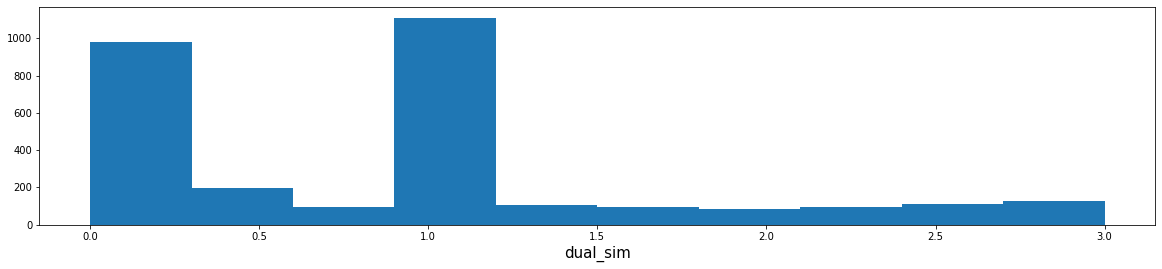

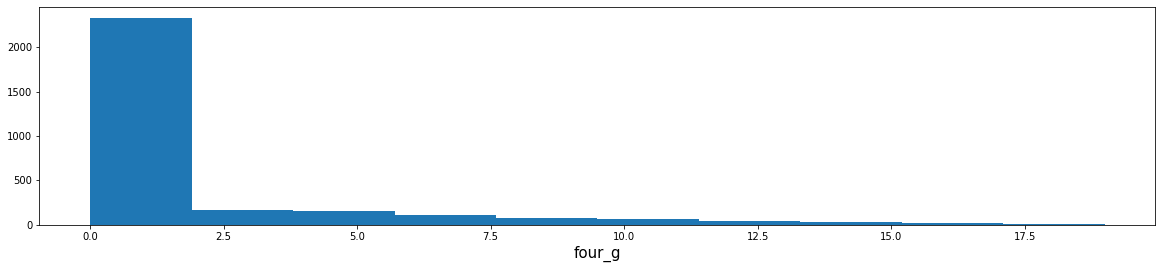

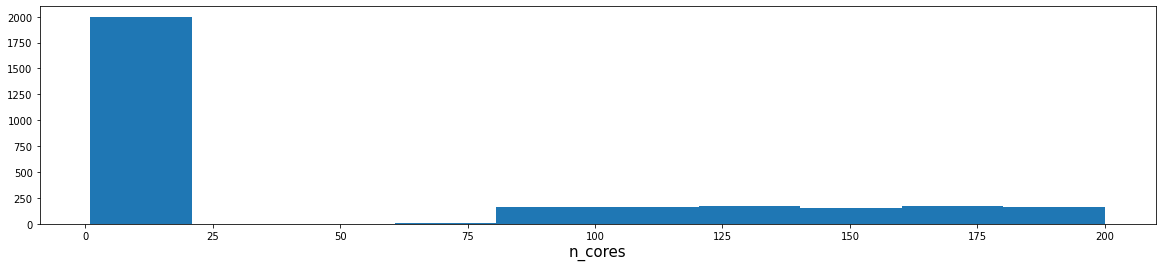

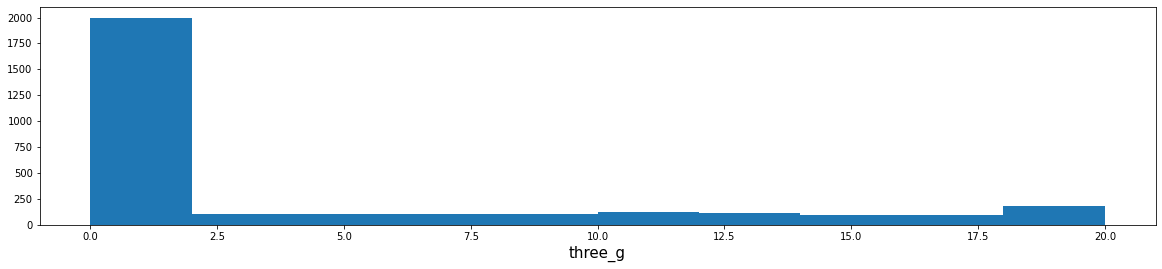

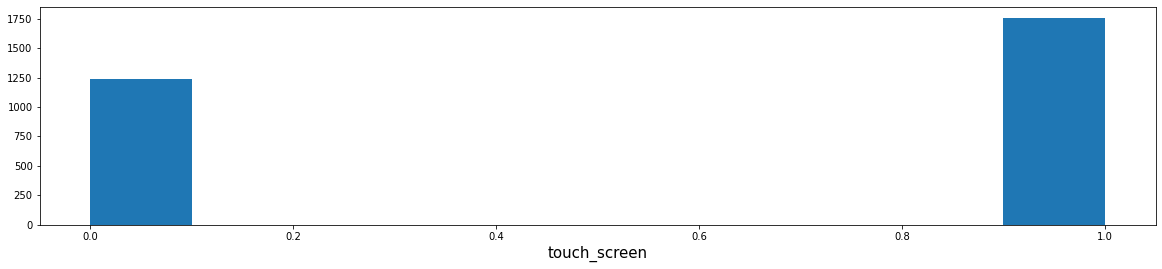

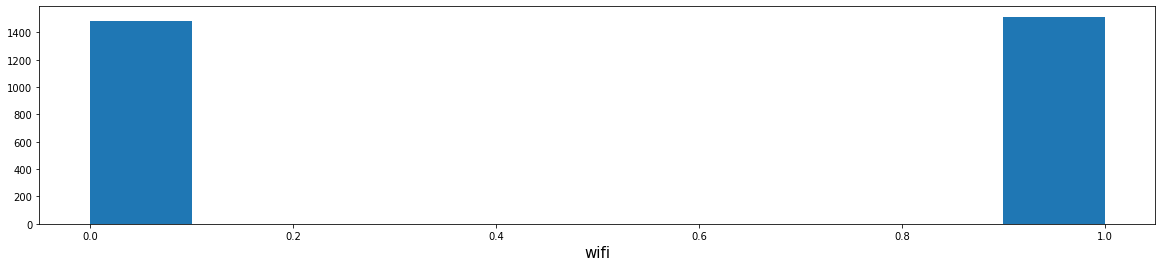

In [16]:
Categorical = ['blue','dual_sim','four_g','n_cores','three_g','touch_screen','wifi']
i = 0
while i<7:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(111)    
    a =    Categorical[i]                  
    plt.hist(dados[a]) 

    plt.xlabel(Categorical[i],fontsize=15)
    i += 1
    

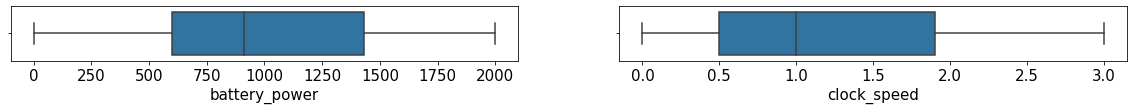

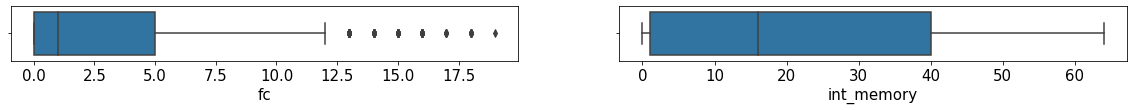

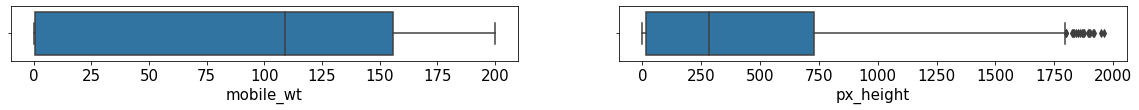

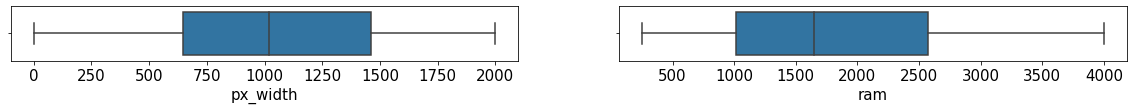

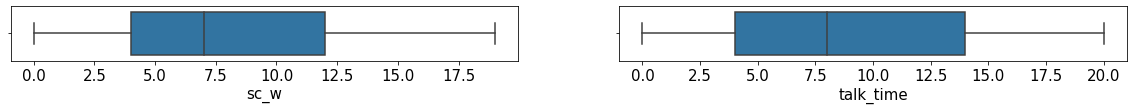

In [24]:
Numerical = ['battery_power','clock_speed','fc','int_memory','mobile_wt','px_height','px_width','ram','sc_w','talk_time']
         
i = 0
while i<10:
    fig = plt.figure(figsize = [20,1])
    plt.subplot(1,2,1)   
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    
    plt.subplot(1,2,2)
    sns.boxplot(x = Numerical[i], data=dados) 
    plt.xticks(fontsize=15)
    plt.xlabel(Numerical[i],fontsize=15)
    i += 1
    plt.show()

[Voltar para o sumário](#sumario)

___
<div id='prediction'></div>

## 3. Modelos de Predição

Descrever e justificar pelo menos **DUAS** técnicas de predição.

### Criando base de teste e treinamento 

A base da dados deve ser seraparada entre uma parte qual será responsável por ensinar o algoritmo a fazer as predições, e em outra na qual o robô será testato, para verificar sua eficiência. 

In [22]:
features = ['battery_power','blue','clock_speed','dual_sim','fc','four_g','int_memory','m_dep'	,'mobile_wt','n_cores',	'px_height','px_width','ram','sc_h'	,'sc_w','talk_time','three_g','touch_screen','wifi','price_range']
X = dados.loc[:, features]
y = dados.loc[:, ['price_range']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .60)

X_train.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
2510,511,958,1.0,2.4,0,1,0,54.0,0.9,166,2,121,630,3324,11,10,18,1,0,1
2876,877,1471,1.0,2.0,0,0,1,54.0,0.7,127,0,193,1134,3315,17,1,4,1,0,1
267,1054,0,1.1,1.0,10,1,38,0.4,136.0,6,1097,1222,1675,18,4,14,1,1,1,1


In [23]:
X_test.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
311,1707,0,1.4,0.0,0,0,41,0.8,80.0,7,1331,1388,1774,12,0,10,0,0,0,2
1025,1081,1,2.5,1.0,13,0,49,1.0,99.0,3,284,519,325,9,1,6,0,0,1,0
1587,1093,0,0.5,0.0,1,1,31,0.6,171.0,2,1310,1420,1646,12,0,6,1,1,0,1


[Voltar para o sumário](#sumario)

___
<div id='validation'></div>

## 4. Processo e Estatísticas de validação

Calcular medidas que informam a performance de cada modelo ajustado. Para cada um:

* Dividir a base de dados em **Treinamento** e **Teste**. Usar **Treinamento** para estimar cada modelo.

* Estudar medidas que validam os modelos.

    Exemplos:

    * <a href='https://help.salesforce.com/s/articleView?id=sf.bi_edd_model_metrics_cross_validation_measure.htm&type=5'>Cross Validation Tab for Numeric Use Cases</a>

    * <a href='https://paulovasconcellos.com.br/como-saber-se-seu-modelo-de-machine-learning-está-funcionando-mesmo-a5892f6468b'>Como saber se seu modelo de Machine Learning está funcionando mesmo</a>

    * <a href='https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/'>Modelos Preditivos de Notas de Redação do ENEM 2015</a>

* Discutir sobre overfitting e underfitting (<a href='https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/'>link</a>)

* **Extra**: Faça o processo de Validação Cruzada utilizando também 10 ciclos e calcule a performance média e desvio padrão das duas medidas R2 e RMS tanto para a parte treinamento como para a parte teste. Discuta com riqueza de detalhes.

[Voltar para o sumário](#sumario)

___
<div id='conclusion'></div>

## 5. Conclusão

[Voltar para o sumário](#sumario)

___
<div id='ref'></div>

## 6. Referências Bibliográficas

- Banco de dados:
https://www.kaggle.com/datasets/muhammetvarl/laptop-price

[Voltar para o sumário](#sumario)